In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=600, centers=3, n_features=2,
                  random_state=0)

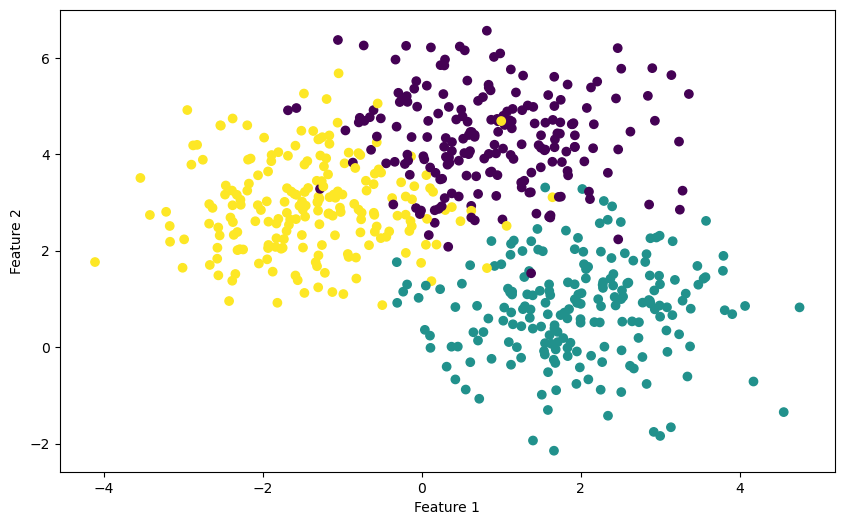

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,:1],X[:,1:2],c=y, cmap='viridis', marker='o') #c=y uses the labels (y) to determine the color of each point.
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [5]:
class KMeans:

    def __init__(self,K=5,max_iters=100,plot_steps=False):
        self.K=K
        self.max_iters=max_iters
        self.plot_steps=plot_steps
        self.centroids=[] # holds centroid coordinates #(K, n_features)
        self.clusters=[[] for _ in range(self.K)] # holds clusters and index of points

    def predict(self,X):
        #step_1: initialize random centroids
        ini_idx=np.random.choice(X.shape[0], self.K, replace=False)
        self.centroids=X[ini_idx]

        #step 2
        for iter in range(self.max_iters):
            #assign each point a cluster
            self.clusters = [[] for _ in range(self.K)]
            for idx,point in enumerate(X):
                #aim: for each point,find the nearest centroid
                min_idx=np.argmin([np.linalg.norm(point-c) for c in self.centroids])
                self.clusters[min_idx].append(idx)

            #calculate new centroids

            self.centroids=[X[np.array(cluster)].mean(axis=0) for cluster in self.clusters]
            
            # self.plot()

    # Assign cluster labels to each point
        y_pred=np.zeros(X.shape[0])
        for cluster_idx, cluster in enumerate(self.clusters):
            for point_idx in cluster:
                y_pred[point_idx] = cluster_idx
        return (self.K,self.centroids,self.clusters,y_pred)
            
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            points = X[index]
            ax.scatter(points[:, 0], points[:, 1])

        for point in self.centroids:
            ax.scatter(point[0], point[1], marker="x", color="black", linewidth=2)

        plt.show()
                

In [6]:
k_=KMeans(3,1000,'a')

In [7]:
y_pred=k_.predict(X)

In [8]:
cluster_means=y_pred[1]
cluster_means=np.array(cluster_means)

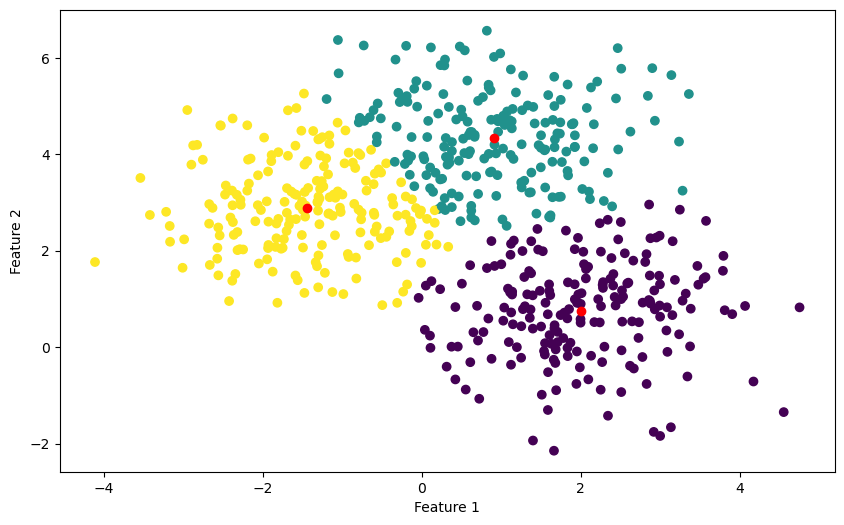

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y_pred[3])
x_coords=cluster_means[:,0]
y_coords=cluster_means[:,1]
plt.scatter(x_coords,y_coords,color='red',label='Cluster means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()